# Data Cleansing : Start

In [1424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_colwidth',300)
pd.set_option('display.max_rows',900)

In [1425]:
TerrorDTframe=pd.read_csv('global_terrorism_clean.csv')

In [1426]:
TerrorDTframe.head()

,date,type,dead,injured,location,details,perpetrator
0,1970-01-13,Shotdown,7,0,"Urabá, Colombia",An UH-1 Iroquois helicopter from the Colombian Air Force disappears amidst strange circumstances in the Urabá Antioquia. The PLA was awarded its shotdown. The seven crew members died.[1],EPL
1,1970-02-08,Bombing,0,0,"Belfast, Northern Ireland",A bomb explodes at the home of Ulster Liberal Party MP Sheelagh Murnaghan,Ulster Volunteer Force
2,1970-02-10,"Shooting, grenade attacks",1,23,"Munich, West Germany","A bus carrying passengers to an El Al airplane at the Munich-Riem Airport, West Germany was attacked by Palestinian terrorists. One person was killed and 23 were wounded in the attack.[2]",PDFLP
3,1970-02-18,Bombing,0,0,"County Donegal, Republic of Ireland",A bomb detonated in a TV station that transmitted RTÉ (Mainly Irish broadcaster),Ulster Volunteer Force
4,1970-02-21,Bombing,47,0,Switzerland,"A bomb explodes in the rear of Swissair Flight 330, causing it to crash near Zürich, killing 38 passengers and all 9 crew members. The attack was carried out by Palestinian group PFLP-GC",PFLP-GC


# The process of extracting the name of the country from column:"Location":
###  Now the location column will have only the  country names

In [1427]:
import pycountry
countryList=[]
for each in pycountry.countries:
    countryList.append(each.name)


In [1428]:
countryList.append('Iran')
countryList.append('Russia')
countryList.append('Syria')
countryList.append('Gaza City')
countryList.append('Bolivia')
countryList.append('Bosnia')
countryList.append('West Bank')
countryList.append('Rafah')
countryList.append('Ivory Coast')
countryList.append('Kedumim')
countryList.append('Transnistria') 
if 'Baghdad' in countryList:
    print('yes')
countryList[0:5]

['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Åland Islands']

In [1429]:
def ExtractCountry(locName):
    flag=False
    tempstr=''
    for each in countryList:
        if each in locName:
            flag=True
            tempstr = each
    if flag==True:
        return tempstr
    else:
        return ''
        

In [1430]:
TerrorDTframe['location'] = TerrorDTframe.location.apply(lambda x: ExtractCountry(x))

### The process of extracting the name of the country from Location Ends : 


In [1431]:
TerrorDTframe = TerrorDTframe[TerrorDTframe.location.notna()]

In [1432]:
TerrorDTframe.rename(columns={'date':'Date','type':'Type','dead':'Dead','injured':'Injured','location':'Location',\
                             'details':'Description','perpetrator':'Perpetrators'},inplace=True)

## Using NLP: Removing the stopwords from the Description column of TerrorDTframe

In [1433]:
import nltk
from nltk.corpus import stopwords
StopWrds = stopwords.words('english')
from nltk.tokenize import word_tokenize as wt
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 
import re
for each in [',','.']:
    StopWrds.append(each)

In [1434]:

wnl = WordNetLemmatizer()
ps=PorterStemmer()
def funcNLP(description):
    wrdset= wt(description)
    filtered_description = ''
    filtered_sentence_list = [wnl.lemmatize(elem) for elem in wrdset if elem.lower() not in StopWrds ]
    filtered_description = ' '.join(each for each in filtered_sentence_list)
    filtered_description = re.sub('\[.*\]','',filtered_description)
    filtered_description = re.sub('\(.*\)','',filtered_description)
    return (filtered_description)
    

In [1435]:
TerrorDTframe['Description'] = TerrorDTframe['Description'].apply(lambda x : funcNLP(x))

# NLP extraction technique ends

# Converting all the blank fields to np.nan and then removing the rows containing nan values from the dataframe

In [1436]:
def func(elem):
    if str(elem) == '':
        return np.nan
    else:
        return elem
        
    

In [1437]:
TerrorDTframe = TerrorDTframe.applymap(lambda x: func(x))

In [1438]:
TerrorDTframe.isna().sum()

Date              0
Type              3
Dead              0
Injured           0
Location        129
Description      77
Perpetrators    410
dtype: int64

In [1439]:
TerrorDTframe_notna = TerrorDTframe.dropna(axis=0,how='any')

In [1440]:
TerrorDTframe_notna.isna().sum()

Date            0
Type            0
Dead            0
Injured         0
Location        0
Description     0
Perpetrators    0
dtype: int64

# Replacing all the date-time values to Date only.Like from 1970-01-02 to 1970

In [1441]:
TerrorDTframe_notna['Date'] = pd.to_datetime(TerrorDTframe_notna['Date'])
TerrorDTframe_notna['Date'] = TerrorDTframe_notna['Date'].dt.year

In [1442]:
TerrorDTframe_notna.head(1)

,Date,Type,Dead,Injured,Location,Description,Perpetrators
0,1970,Shotdown,7,0,Colombia,UH-1 Iroquois helicopter Colombian Air Force disappears amidst strange circumstance Urabá Antioquia PLA awarded shotdown seven crew member died,EPL


# Extracting the names of the terrorists and keeping only 17 Terrorists

In [1443]:
def terror_group_merge(x):
    if 'Islamic State' in str(x).strip().title():
        return 'Islamic State'
    if 'Boko Haram' in str(x).strip().title():
        return 'Boko Haram'
    if 'Al-Shabaab' in str(x).strip().title():
        return 'Al-Shabaab'
    if 'Al-Qaeda' in str(x).strip().title():
        return 'Al-Qaeda'
    if 'Taliban' in str(x).strip().title():
        return 'Taliban'
    else:
        return x

In [1444]:
TerrorDTframe_notna.Perpetrators = TerrorDTframe_notna.Perpetrators.apply(lambda x : terror_group_merge(x))
Terror_Count = TerrorDTframe_notna.Perpetrators.value_counts().to_frame().reset_index(drop=False)\
                                            .rename(columns={'index':'Perpetrators','Perpetrators':'Perpetrators_Count'})
Terror_Count = Terror_Count[Terror_Count.Perpetrators_Count > 50]

In [1445]:
terror_Name_List = Terror_Count.Perpetrators
TerrorDTframe_notna = TerrorDTframe_notna[TerrorDTframe_notna.Perpetrators.isin(terror_Name_List)]
TerrorDTframe_notna.shape

(5456, 7)

In [1446]:
TerrorDTframe_notna.head(1)

,Date,Type,Dead,Injured,Location,Description,Perpetrators
24,1970,"Ambush, Shooting",7,0,Colombia,7 soldier killed ascribed army 's Ricaurte battalion fell ambush FARC rural area Cimitarra,FARC


#  Keeping only one Type in each row

In [1447]:
def extract_One_Name(x):
    if 'Bomb' in x.strip().title():
        return 'Bombing'
    elif 'Shoot' in x.strip().title():
        return 'Shooting'
    elif 'Execut' in x.strip().title():
        return 'Execution'
    elif ',' in str(x):
        return(str(x).split(',')[0])
    else:
        return(x)
    

In [1448]:
TerrorDTframe_notna['Type'] = TerrorDTframe_notna.Type.apply(lambda x : extract_One_Name(x))
TerrorDTframe_notna.Type.shape

(5456,)

In [1449]:
TerrorDTframe_notna = TerrorDTframe_notna.reset_index(drop=True)
TerrorDTframe_notna.shape

(5456, 7)

In [1450]:
TerrorDTframe_notna.to_csv('C:\\Users\\supratik chanda\\Documents\\All Docs\\FinalTerrorDataFrame.csv',index=False)

# Data Cleansing: Stop

# Start of Analyzing DataSet

# Killing Worldwide

## Killings by Year

##### Let’s start by looking to the killings in terror activities. In the following , the size of the areas corresponding to each year is proportional with the number of kills in that year in the terrorist activities. We can easily see that there was a massive increase in killings in terrorist activities in the years from 2012 and in the last 3 years (2017-2019) the volume was significantly higher than in the previous years.

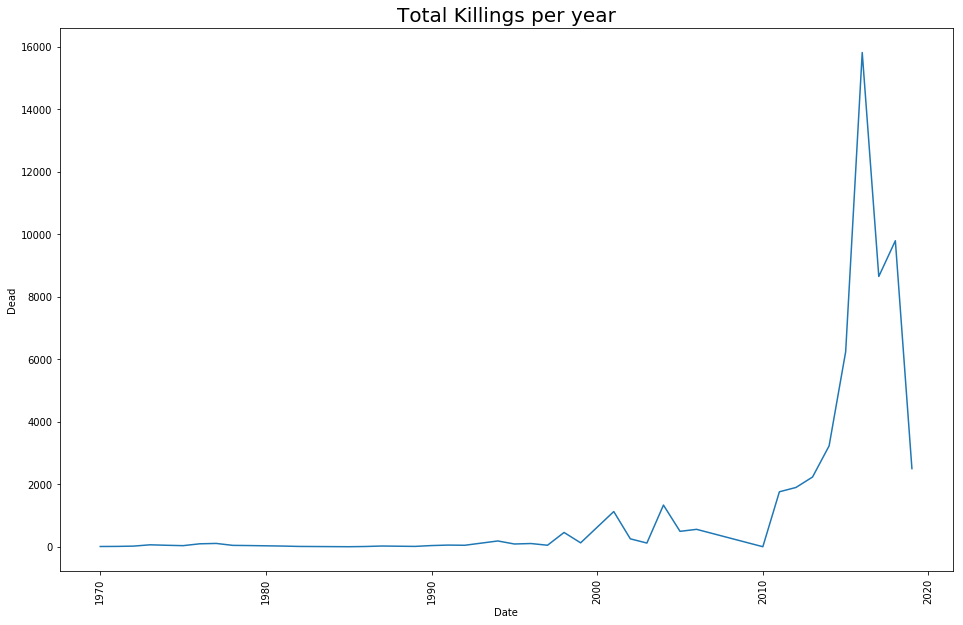

In [1451]:
killing_worldwide = TerrorDTframe_notna.groupby('Date').agg({'Dead':np.sum})
killing_worldwide =killing_worldwide .reset_index(drop=False) 
import squarify
plt.figure(figsize=(16,10))
sns.lineplot(x=killing_worldwide['Date'],y=killing_worldwide['Dead'])
#squarify.plot(sizes=killing_worldwide['Dead'], label=killing_worldwide['Date'],alpha=0.4)
#plt.axis('off')
plt.title('Total Killings per year',fontsize=20)
plt.xticks(rotation=90)
plt.show()


## Killings by country

##### If we look now to the country split, we see that there are few countries where the number of killed people in terrorist attacks is very large. Some of them have experienced recent massive increase, like Iraq, Nigeria, Syria and Afganistan while others have a long history, like Sri Lanka, Colombia, India, Pakistan. 

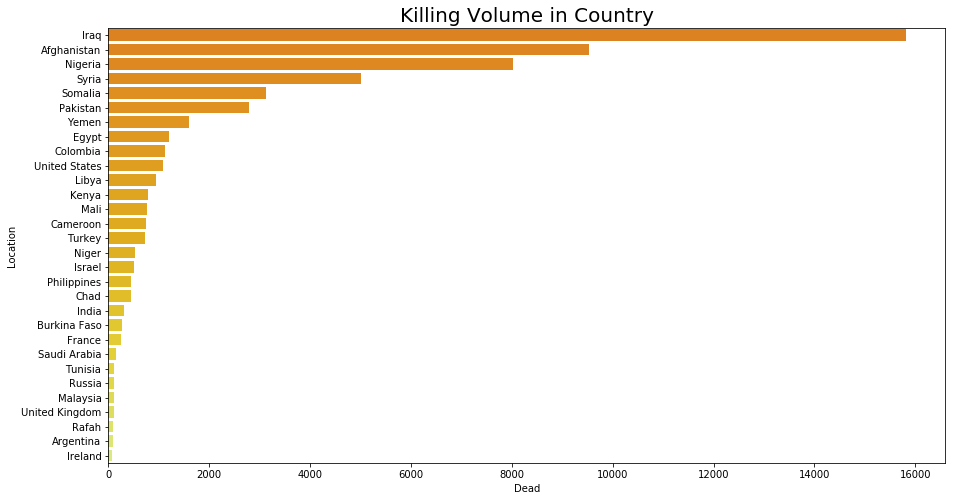

In [1452]:
killing_by_Country = TerrorDTframe_notna.groupby('Location').agg({'Dead':np.sum})
killing_by_Country =killing_by_Country.sort_values(by='Dead',ascending=False).reset_index(drop=False) 
killing_by_Country = killing_by_Country.query('Dead != 0')
import squarify
plt.figure(figsize=(15,8))
sns.barplot(x=killing_by_Country['Dead'][0:30], y=killing_by_Country['Location'][0:30],palette='Wistia_r')
#plt.axis('off')
plt.title('Killing Volume in Country',fontsize=20)
#plt.xticks(rotation=90)
plt.show()

# Killings by Perpetrators and years

In [1453]:
TerrorDTframe_notna.Perpetrators.unique()

array(['FARC', 'Unknown', 'PIRA', 'ELN', 'PKK', 'Hamas', 'Al-Qaeda',
       'Taliban', 'Islamist insurgents', 'Abu Sayyaf', 'Al-Shabaab',
       'Boko Haram', 'Islamic State', "New People's Army",
       'Palestinian lone wolf', 'Jaish-e-Mohammed (suspected)', 'CPI'],
      dtype=object)

In [1454]:
snsDTFrame = TerrorDTframe_notna.loc[:,['Date','Dead','Perpetrators']]
snsDTFrame = snsDTFrame[snsDTFrame.Perpetrators.isin(['Boko Haram','Islamic State',\
                                                              'Taliban','Jaish-e-Mohammed','Al-Shabaab','Al-Qaeda'])]
yearDTFrame=pd.Series()
Dead_Count_DTFrame = pd.Series()
Perpetrators_DTFrame= pd.Series()
snsDTFrame.drop(index=[2474],axis=0,inplace=True)
for key,value in snsDTFrame.groupby(['Perpetrators','Date']):
    yearDTFrame = yearDTFrame.append(pd.Series(value.Date.unique()[0]))
    Dead_Count_DTFrame = Dead_Count_DTFrame.append(pd.Series(value.Dead.sum()))
    Perpetrators_DTFrame = Perpetrators_DTFrame.append(pd.Series(value.Perpetrators.unique()[0]))
OverallDTFrame = pd.concat([yearDTFrame,Dead_Count_DTFrame,Perpetrators_DTFrame],axis=1)
OverallDTFrame = OverallDTFrame.reset_index(drop=True)
OverallDTFrame.columns=['Date','Dead_Count','Perpetrators']

In [1455]:
snsDTFrame_Pivot_table = pd.pivot_table(data = OverallDTFrame,columns='Perpetrators',values='Dead_Count',index='Date')

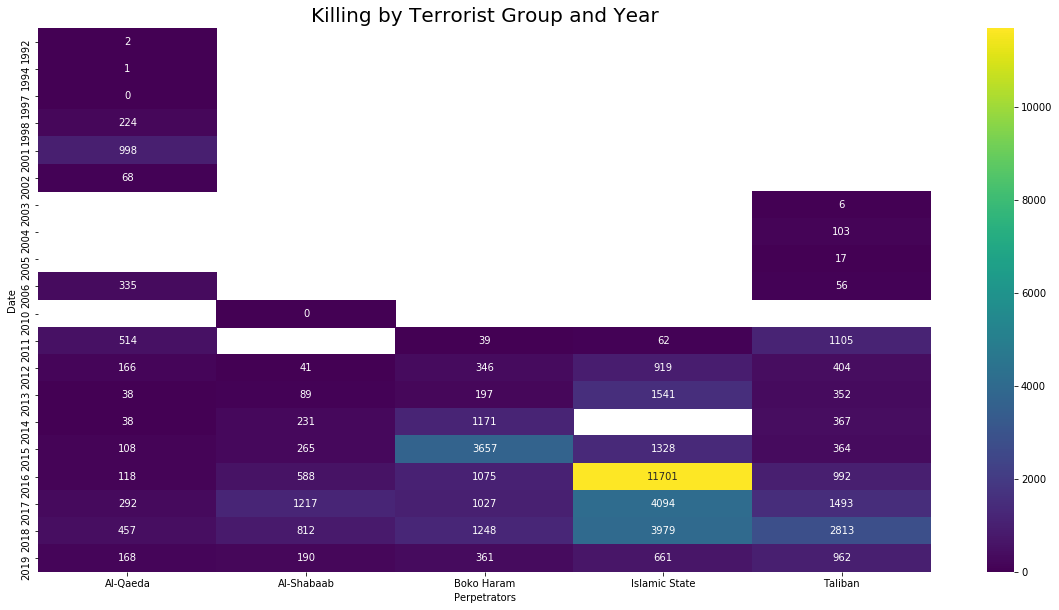

In [1456]:
plt.figure(figsize=(20,10))
sns.heatmap(snsDTFrame_Pivot_table,annot=True,cmap='viridis',fmt='g')
plt.title('Killing by Terrorist Group and Year',fontsize=20)
plt.show()

# American Citizens Killed and Injured
## Let’s look now to the numbers of american citizens killed as well as injured worldwide.The leading country for US citizens killed in United States

In [1457]:
TerrorDT_In_USA_Dead = TerrorDTframe_notna.loc[TerrorDTframe_notna.Location.str.contains('United States',case=False),\
                                          ['Date','Dead','Perpetrators']]
TerrorDT_In_USA_Dead = TerrorDT_In_USA_Dead.groupby('Date').agg({'Dead':np.sum}).reset_index(drop=False)
TerrorDT_In_USA_Injured = TerrorDTframe_notna.loc[TerrorDTframe_notna.Location.str.contains('United States',case=False),\
                                          ['Date','Injured','Perpetrators']]
TerrorDT_In_USA_Injured = TerrorDT_In_USA_Injured.groupby('Date').agg({'Injured':np.sum}).reset_index(drop=False)

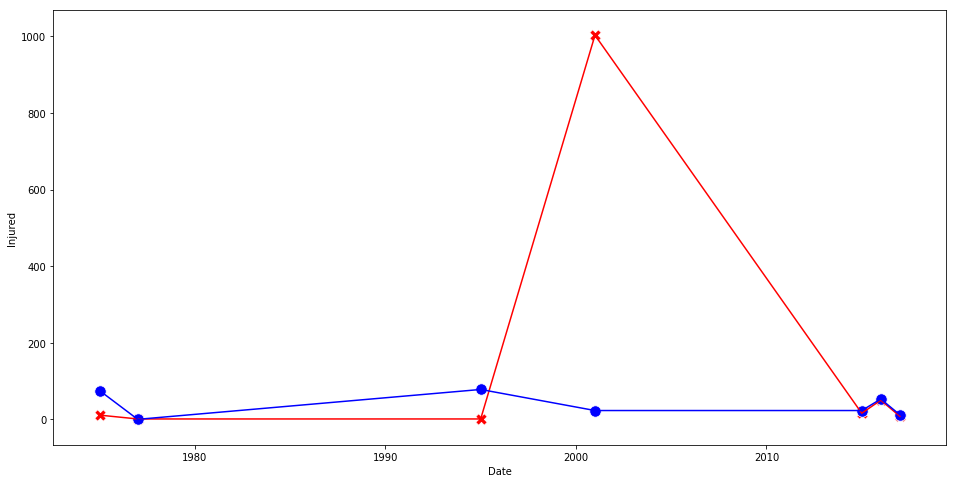

In [1458]:
plt.figure(figsize=(16,8))
sns.lineplot(x=TerrorDT_In_USA_Dead.Date,y=TerrorDT_In_USA_Dead.Dead,color='Red')
sns.scatterplot(x=TerrorDT_In_USA_Dead.Date,y=TerrorDT_In_USA_Dead.Dead,color='Red',s=130,marker='X')
sns.lineplot(x=TerrorDT_In_USA_Injured.Date,y=TerrorDT_In_USA_Injured.Injured,color='Blue')
sns.scatterplot(x=TerrorDT_In_USA_Injured.Date,y=TerrorDT_In_USA_Injured.Injured,color='Blue',s=130,marker='o')
plt.show()

# Motive Analysis

## Motive wordcloud

#### Let’s analyze the motive of the attacks. We will treat two alike words the same irrespective of their case

In [1459]:
motive_Of_Attacks=''
TerrorDTframe_for_motive_analysis=pd.read_csv('global_terrorism_clean.csv')
for each in TerrorDTframe_for_motive_analysis.type:
    eachsplitted = str(each).split(',')
    if len(eachsplitted)> 1:
        for elem in eachsplitted:
            motive_Of_Attacks = motive_Of_Attacks + ' ' + elem
    else:
        motive_Of_Attacks = motive_Of_Attacks + ' ' + elem

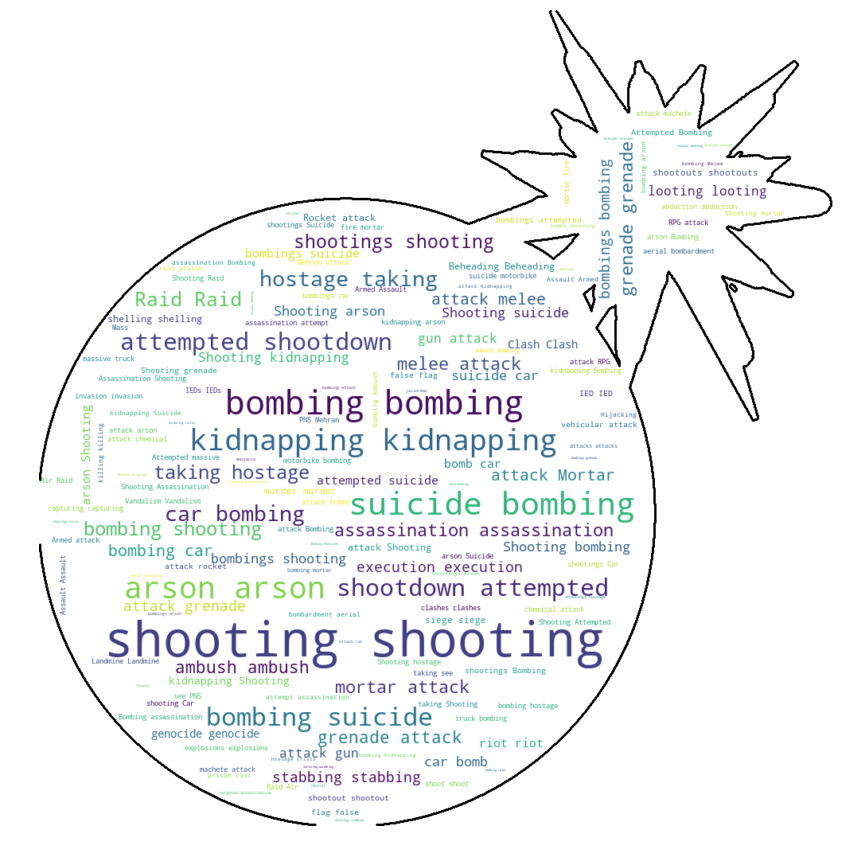

In [1460]:
from wordcloud import WordCloud
from PIL import Image
def image_generator(image):
    python_mask = np.array(Image.open(image))
    wcObj = WordCloud(background_color='white',mask=python_mask,contour_color='black',contour_width=3)
    wcObj.generate(motive_Of_Attacks)
    fig=plt.figure(figsize=(20,15))
    plt.imshow(wcObj,interpolation='bilinear')
    plt.axis('off')
    plt.savefig('bomb_wordcloud.png')
    #plt.show()
image_generator('bomb.jpg')

# Summary WordCloud

## Let’s perform a similar text analysis on the Description field, the field that describes the terrorist event.

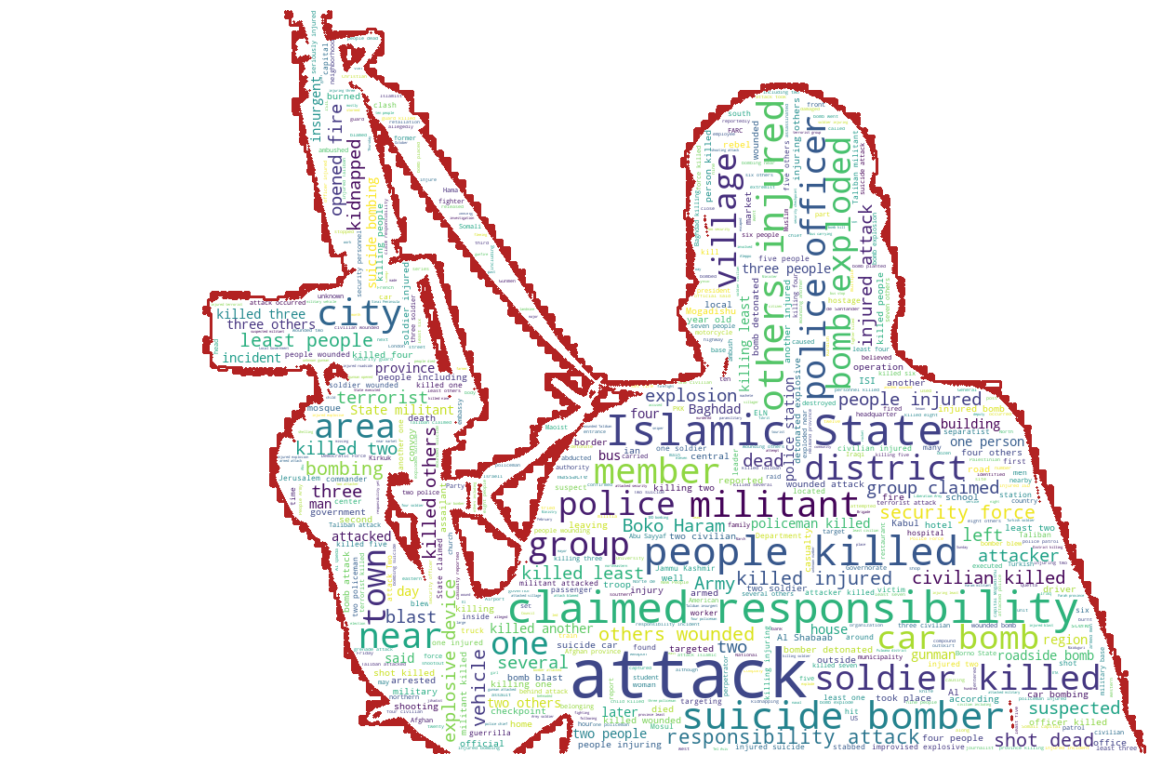

In [1461]:
from wordcloud import WordCloud
from PIL import Image
def image_generator(image):
    python_mask = np.array(Image.open(image))
    wcObj = WordCloud(background_color='white',max_words=600,mask=python_mask,contour_color='firebrick',contour_width=3)
    wcObj.generate(strCorpus)
    fig=plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(20)
    plt.imshow(wcObj,interpolation='bilinear')
    plt.axis('off')
    plt.savefig('wordcloud.png')
    #plt.show()
image_generator('Terrorist.jpg')

## We can see that the most frequent concepts used are claimed, bomb, responsibility, attack, shot, suicide bomber, militant, Islamic State, opened fire, injured, police.

# Perpetrators Group
### Let’s see now the distribution of events and impact grouped on the perpetrators name. 
### First we show the  perpetrators group based on the number of dead victims.

In [1462]:
Perpetrators = TerrorDTframe_notna.groupby(['Perpetrators']).agg({'Dead':np.sum})
Perpetrators = Perpetrators.sort_values(by=['Dead'],ascending=False).reset_index(drop=False)
Perpetrators

,Perpetrators,Dead
0,Islamic State,24285
1,Boko Haram,9121
2,Taliban,9034
3,Unknown,3929
4,Al-Shabaab,3578
5,Al-Qaeda,3527
6,Islamist insurgents,1532
7,FARC,671
8,Hamas,505
9,ELN,392


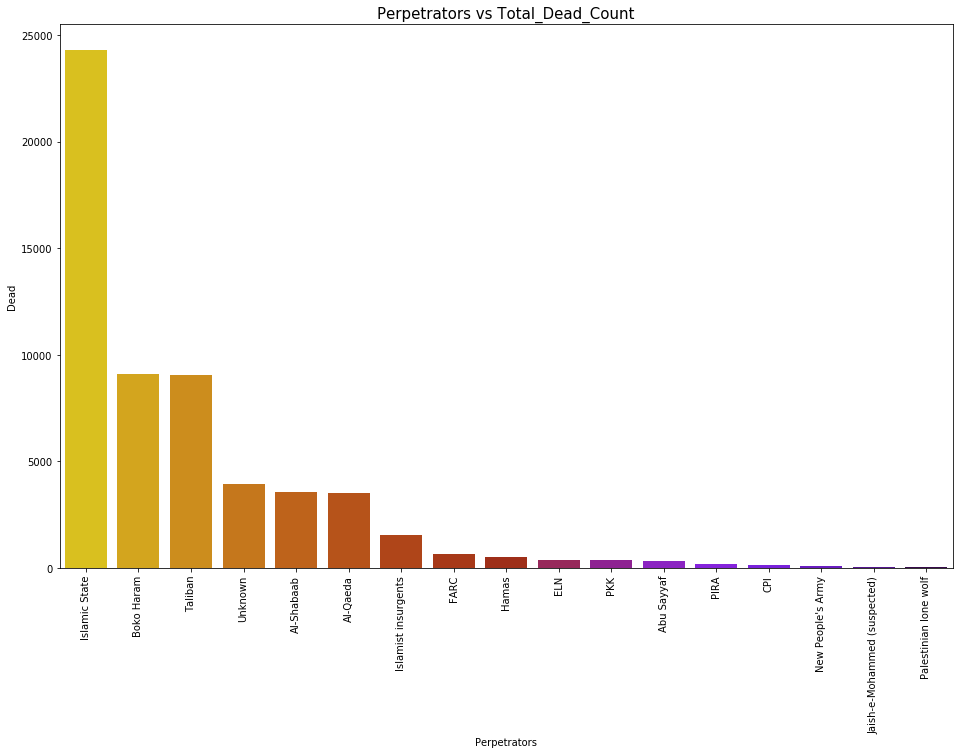

In [1463]:
plt.figure(figsize=(16,10))
sns.barplot(x=Perpetrators['Perpetrators'],y=Perpetrators['Dead'],palette='gnuplot_r')
plt.xticks(rotation=90)
plt.title('Perpetrators vs Total_Dead_Count',fontsize=15)
plt.show()

## Let’s see also the terror groups based on number of terrorist attacks

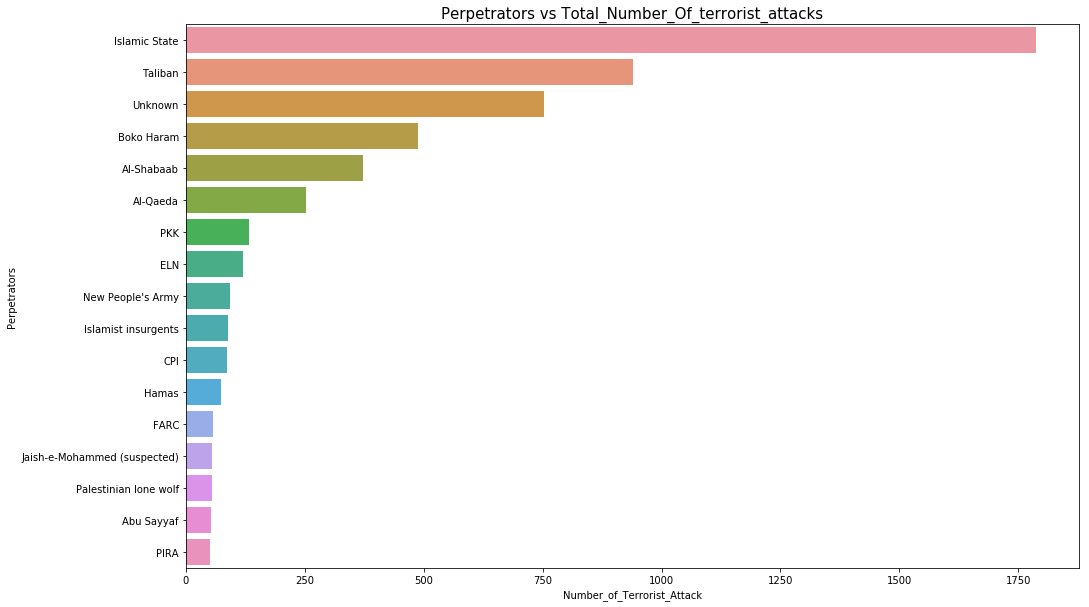

In [1464]:
totalTerroristAttack = TerrorDTframe_notna.Perpetrators.value_counts().to_frame().reset_index(drop=False)\
                                                .rename(columns={'index':'Perpetrators','Perpetrators':'Number_of_Terrorist_Attack'})
plt.figure(figsize=(16,10))
sns.barplot(y=totalTerroristAttack.Perpetrators,x=totalTerroristAttack.Number_of_Terrorist_Attack)
plt.title('Perpetrators vs Total_Number_Of_terrorist_attacks',fontsize=15)
plt.show()

## Top 10 crimes committed from 1970 to 2019

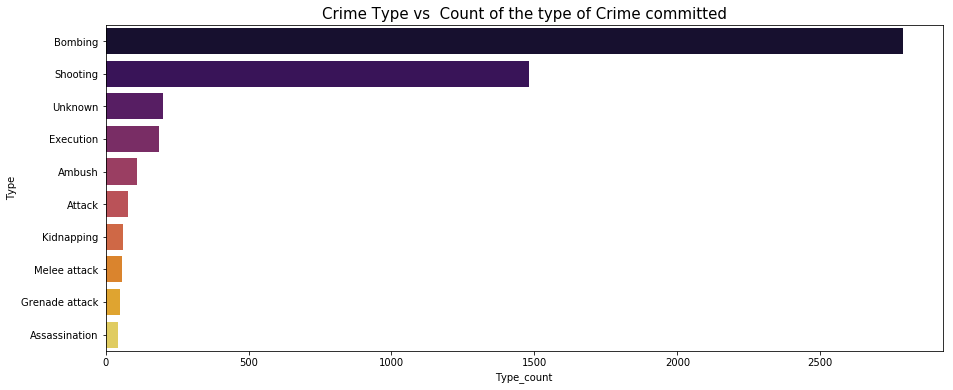

In [1465]:
Attack_count = TerrorDTframe_notna.Type.value_counts().to_frame().reset_index(drop=False)\
                                                            .rename(columns={'index':'Type','Type':'Type_count'})
plt.figure(figsize=(15,6))
sns.barplot(y=Attack_count['Type'][0:10],x=Attack_count['Type_count'][0:10],palette='inferno')
plt.title('Crime Type vs  Count of the type of Crime committed',fontsize=15)
plt.show()

# Top 10 Countries where the most terrorist attack happened

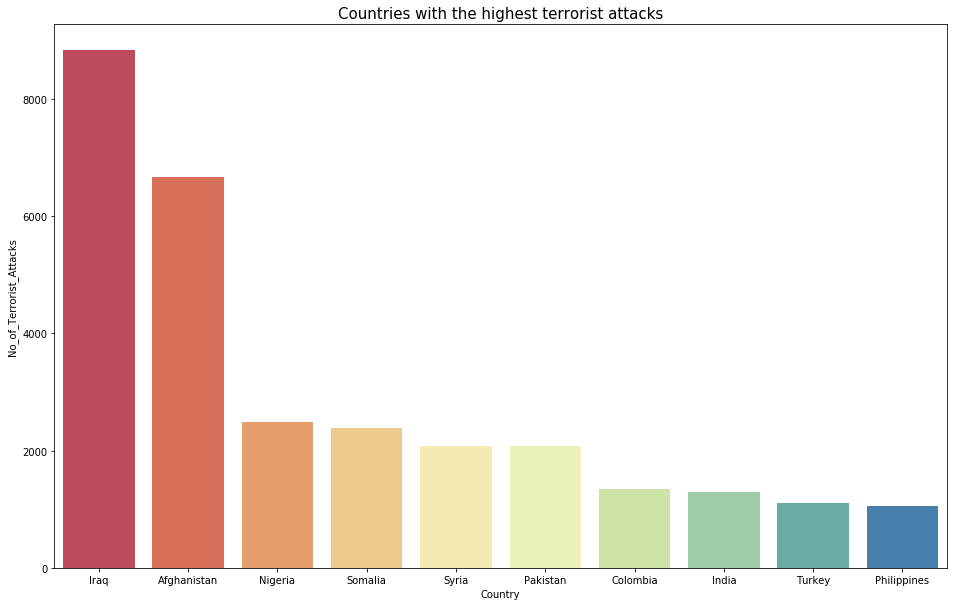

In [1466]:
Country_with_most_terrorist_attacks = TerrorDTframe_notna.groupby(['Location'])
OverallDTFrame=pd.DataFrame()
#Country_with_most_terrorist_attacks = Perpetrators.sort_values(by=['Type'],ascending=False).reset_index(drop=False)
for key,value in Country_with_most_terrorist_attacks:
    tempDT = pd.DataFrame()
    tempDT = pd.concat([pd.Series(key),pd.Series(value.size)],axis=1)
    OverallDTFrame = pd.concat([OverallDTFrame,tempDT],axis=0)
OverallDTFrame.columns=['Country','No_of_Terrorist_Attacks']
OverallDTFrame = OverallDTFrame.sort_values(by='No_of_Terrorist_Attacks',ascending=False).reset_index(drop=True)
OverallDTFrame.head()
plt.figure(figsize=(16,10))
sns.barplot(x=OverallDTFrame.Country[:10],y=OverallDTFrame.No_of_Terrorist_Attacks[:10],palette='Spectral')
plt.title('Countries with the highest terrorist attacks',fontsize=15)
plt.show()

## Question 1: What type of terrorist attacks(e.g. shooting,bomb etc.) is the most in which country 

In [1467]:
groupByCountry = TerrorDTframe_notna.groupby(['Location','Type']).agg({'Dead':np.sum})
groupByCountry = groupByCountry.reset_index(drop=False)

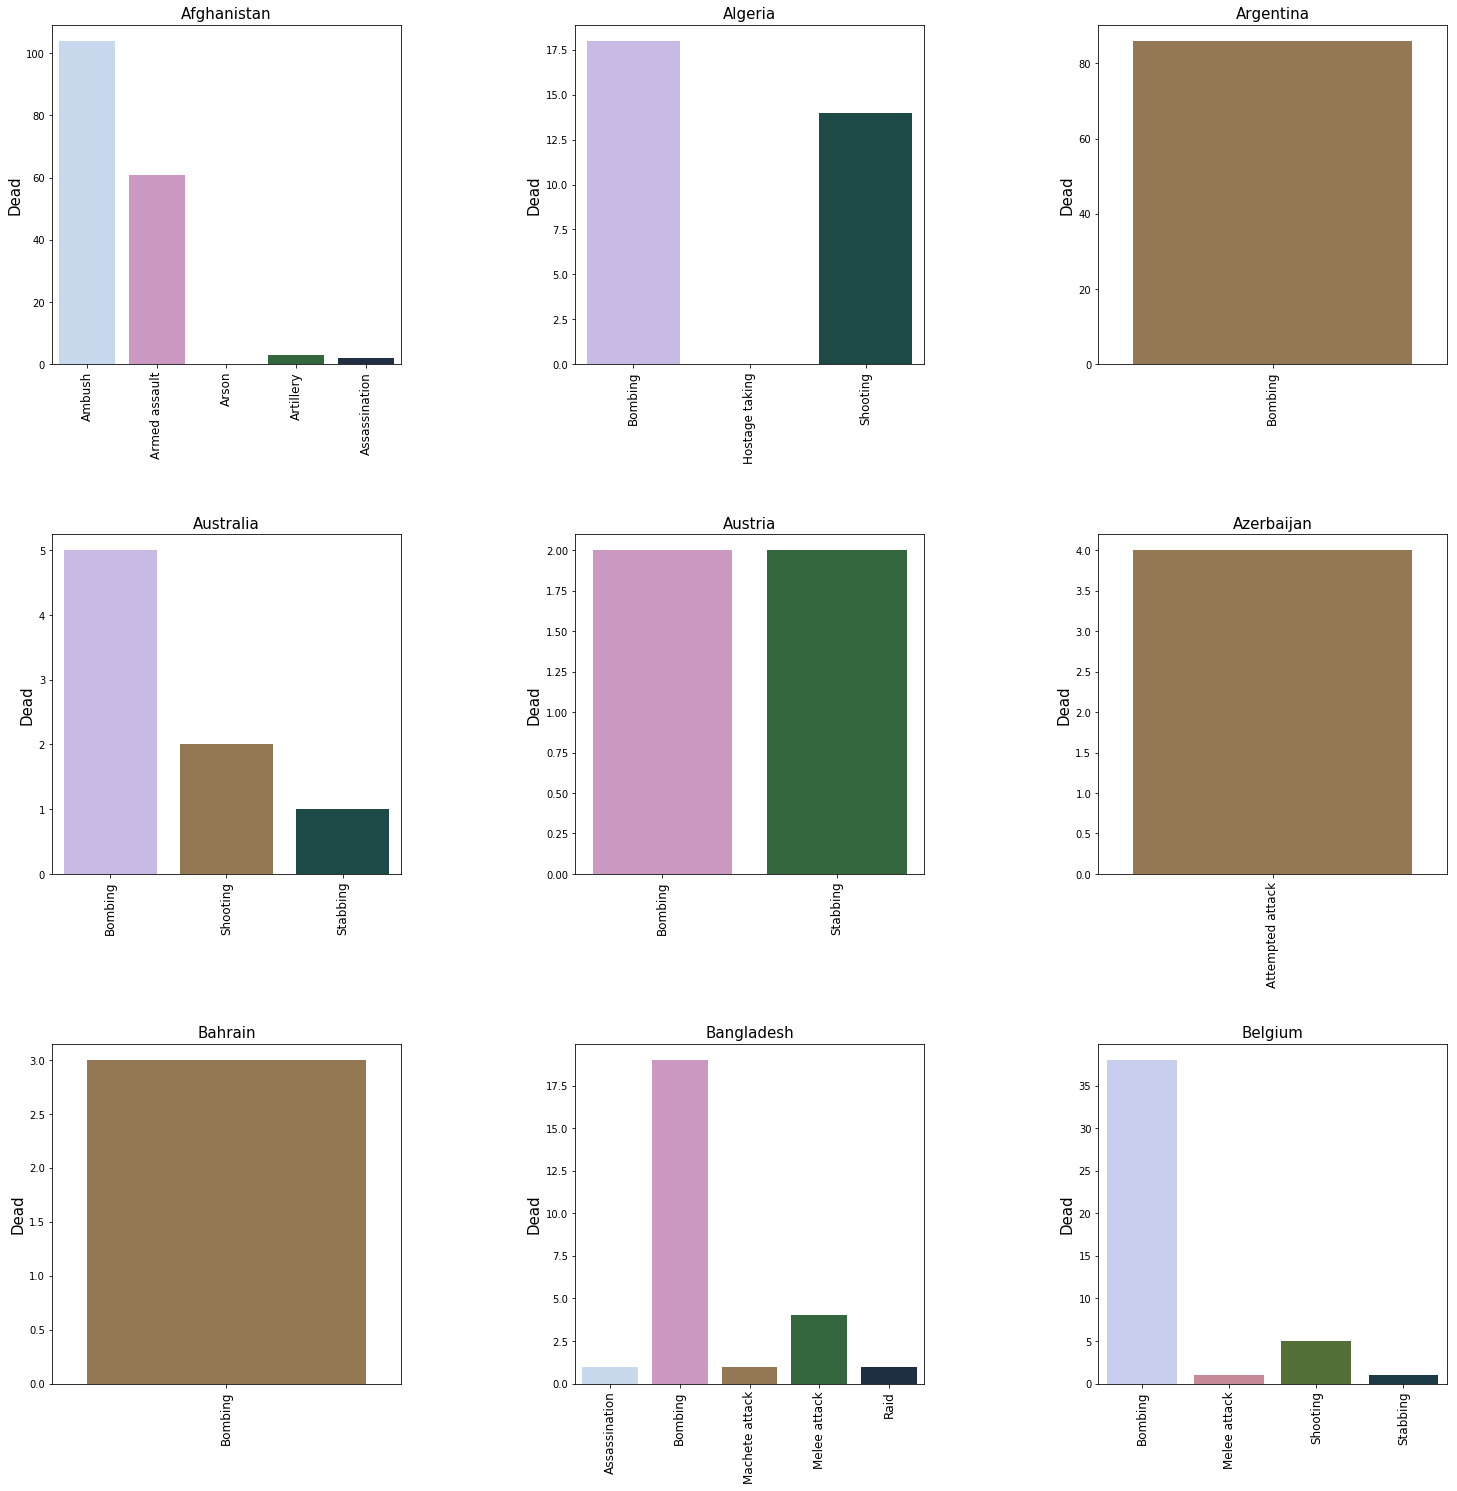

In [1468]:
i=1
fig=plt.figure(figsize=(25,25))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
for key,value in groupByCountry.groupby('Location'):
    if value.Dead.sum() > 0:
        ax= fig.add_subplot(3,3,i)
        ax = sns.barplot(x=value['Type'][0:5],y=value['Dead'][0:5],palette='cubehelix_r')
        i+=1
        plt.title(key,fontsize=15)
        plt.xticks(rotation=90,fontsize=12)
        plt.ylabel('Dead',fontsize=15)
        plt.xlabel('')
        if i ==10:
            break
    

## Which terrorist group has caused highest death count in which countries.

In [1469]:
import plotly.plotly as py
import pandas as pd
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df.columns

Index(['COUNTRY', 'GDP (BILLIONS)', 'CODE'], dtype='object')

In [1470]:
TerrorDTframe_notna.head(1)

,Date,Type,Dead,Injured,Location,Description,Perpetrators
0,1970,Shooting,7,0,Colombia,7 soldier killed ascribed army 's Ricaurte battalion fell ambush FARC rural area Cimitarra,FARC


In [1471]:
k =TerrorDTframe_notna.groupby(['Location','Perpetrators']).agg({'Dead':np.sum})
k.reset_index(drop=False,inplace=True)

In [1472]:
most_terror_in_country = pd.DataFrame()
for each in TerrorDTframe_notna.Location.unique():
    country_terror = k.groupby('Location').get_group(each).sort_values(by='Dead',ascending=False).reset_index(drop=True)[0:1]
    most_terror_in_country = pd.concat([most_terror_in_country,country_terror],axis=0)
most_terror_in_country.reset_index(drop=True,inplace=True)
most_terror_in_country.rename(columns={'Location':'COUNTRY'},inplace=True)
most_terror_in_country.head()

,COUNTRY,Perpetrators,Dead
0,Colombia,FARC,657
1,Canada,Islamic State,1
2,Ireland,PIRA,80
3,United Kingdom,PIRA,90
4,Italy,Unknown,4


In [1473]:
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [1474]:
most_terror_in_country_DTFrame = pd.merge(most_terror_in_country,df,how='inner',on='COUNTRY')
most_terror_in_country_DTFrame.head()

,COUNTRY,Perpetrators,Dead,GDP (BILLIONS),CODE
0,Colombia,FARC,657,400.1,COL
1,Canada,Islamic State,1,1794.0,CAN
2,Ireland,PIRA,80,245.8,IRL
3,United Kingdom,PIRA,90,2848.0,GBR
4,Italy,Unknown,4,2129.0,ITA


In [1475]:
most_terror_in_country_DTFrame['Perpetrators_Name_with_COUNTRY_Name'] = pd.DataFrame(most_terror_in_country_DTFrame['Perpetrators']+ '::' + most_terror_in_country_DTFrame['COUNTRY'])
most_terror_in_country_DTFrame.head()

,COUNTRY,Perpetrators,Dead,GDP (BILLIONS),CODE,Perpetrators_Name_with_COUNTRY_Name
0,Colombia,FARC,657,400.1,COL,FARC::Colombia
1,Canada,Islamic State,1,1794.0,CAN,Islamic State::Canada
2,Ireland,PIRA,80,245.8,IRL,PIRA::Ireland
3,United Kingdom,PIRA,90,2848.0,GBR,PIRA::United Kingdom
4,Italy,Unknown,4,2129.0,ITA,Unknown::Italy


### Map showing terrorists responsible for the maximum deaths in the country: Start

In [1476]:
data = [dict(
    type='choropleth',
    locations=most_terror_in_country_DTFrame['CODE'],
    z=most_terror_in_country_DTFrame['Dead'],
    text=most_terror_in_country_DTFrame['Perpetrators_Name_with_COUNTRY_Name'],
    colorscale=[[0, "rgb(5, 10, 172)"], [0.4, "rgb(40, 60, 190)"], [0.5, "rgb(70, 100, 245)"],\
                [0.3, "rgb(90, 120, 245)"], [0.5, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
    autocolorscale=False,
    reversescale=True,
    
    colorbar=dict(
        autotick=True,
        title='Dead_Count'),
)]

layout = dict(
    title='Terrorist who are responsible for the maximum deaths',
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig = dict(data=data, layout=layout)
plot(fig,validate=False, filename='d3-world-map-od-max-deaths-by-a-terrorist-group.html')


'file://C:\\Users\\supratik chanda\\Desktop\\Python Tutorial1\\Data Science Final Project\\d3-world-map-od-max-deaths-by-a-terrorist-group.html'

## Which terrorist forces are increasing each year 

In [1477]:
TerrorDTframe_notna.head()

,Date,Type,Dead,Injured,Location,Description,Perpetrators
0,1970,Shooting,7,0,Colombia,7 soldier killed ascribed army 's Ricaurte battalion fell ambush FARC rural area Cimitarra,FARC
1,1971,Shooting,10,0,Colombia,site known San Miguel rural Gaitania member FARC attack patrol 23 soldier assigned Caicedo Battalion 10 uniformed men die action,FARC
2,1972,Bombing,1,0,Canada,Cuban official Sergio Pérez Castillo killed explosion Cuban consulate Montreal,Unknown
3,1972,Bombing,9,130,Ireland,Bloody Friday : Nine killed 130 injured Provisional Irish Republican Army set 22 bomb,PIRA
4,1972,Bombing,9,30,United Kingdom,Claudy bombing ; three car bomb detonated Claudy killing nine people group claimed responsibility,PIRA


In [1478]:
group_Of_Perpetrators=pd.DataFrame()
grp_with_highest_attacks = TerrorDTframe_notna.groupby(['Perpetrators','Date'])
for key,value in grp_with_highest_attacks:
    tempDT = pd.concat([pd.Series(key[0]),pd.Series(key[1]),pd.Series(value.Type.size)],axis=1)
    group_Of_Perpetrators = pd.concat([group_Of_Perpetrators,tempDT],axis=0)
group_Of_Perpetrators.columns = ['Perpetrators','Date','Total_Attacks']
group_Of_Perpetrators.reset_index(drop=True,inplace=True)
group_Of_Perpetrators.head()

,Perpetrators,Date,Total_Attacks
0,Abu Sayyaf,2004,1
1,Abu Sayyaf,2006,1
2,Abu Sayyaf,2011,1
3,Abu Sayyaf,2013,1
4,Abu Sayyaf,2016,15


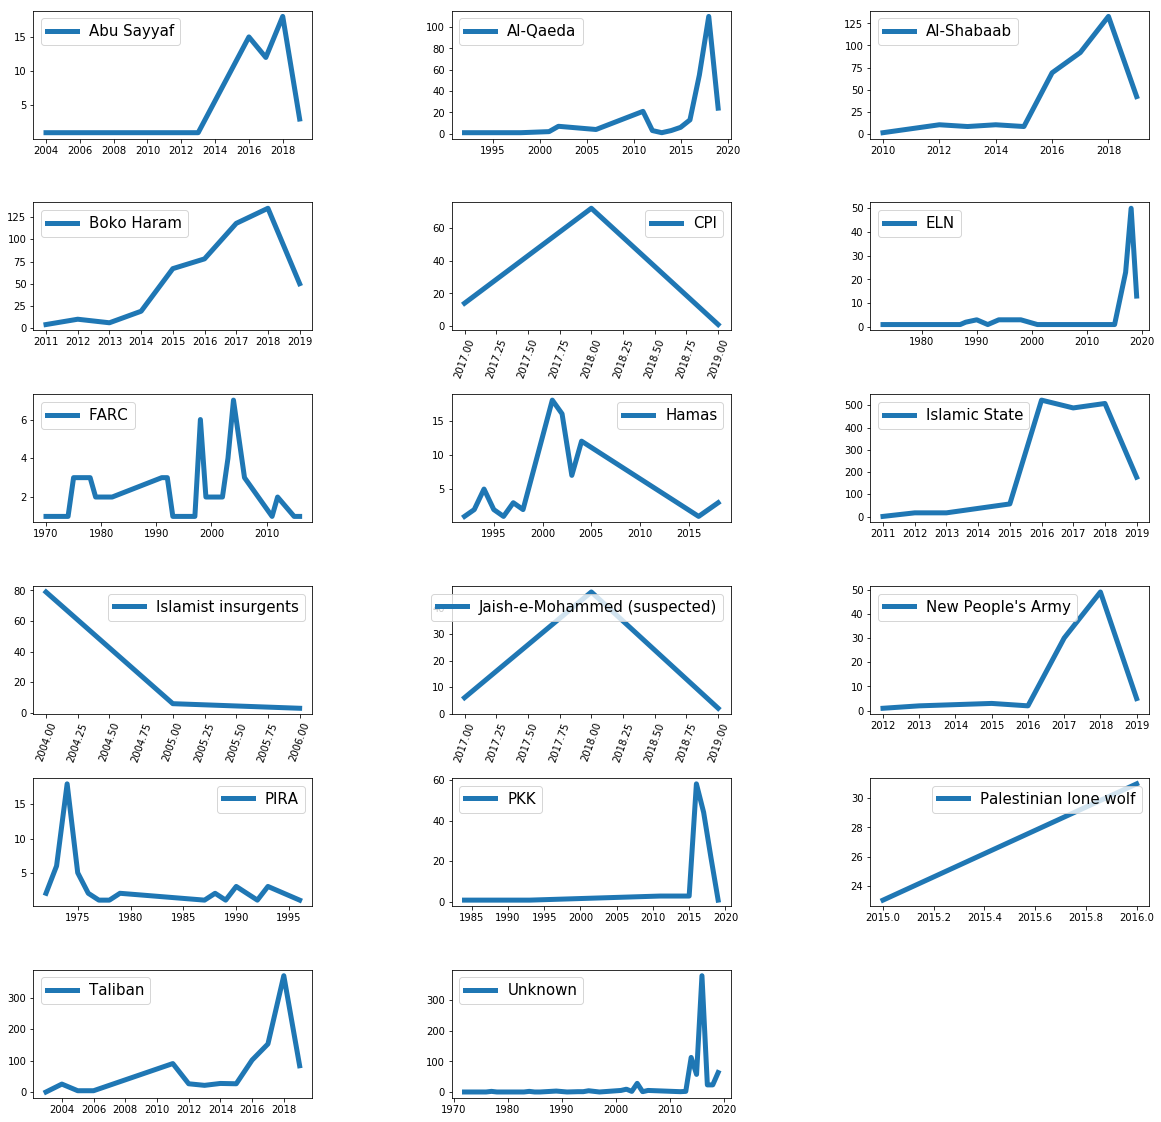

In [1479]:
fig=plt.figure(figsize=(20,20)) 
fig.subplots_adjust(wspace=0.5,hspace=0.5)
i=1
for key,value in group_Of_Perpetrators.groupby('Perpetrators'):
        ax=fig.add_subplot(6,3,i)
        ax=plt.plot(value['Date'],value['Total_Attacks'],label=key,lw=5)
        i+=1
        if key in ['Jaish-e-Mohammed (suspected)','Islamist insurgents','CPI']:
            plt.xticks(rotation=70)
        plt.legend(loc='best',fontsize=15)
#plt.show()

# End

In [1480]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
vectorizer = tfidf(max_features=2000)
X_description = vectorizer.fit_transform(TerrorDTframe_notna.Description)
print(vectorizer.get_feature_names()[0:10])
X_description = X_description.toarray()

['000', '10', '100', '10th', '11', '12', '120', '13', '130', '14']


In [1481]:
dtFrame= pd.DataFrame(X_description)

dtFrame.shape

(5456, 2000)

In [1482]:
dtFrame = pd.concat([dtFrame,TerrorDTframe_notna.Type,TerrorDTframe_notna.Location],axis=1)

In [1483]:
print(dtFrame.shape)
dtFrame.head()

(5456, 2002)


,0,1,2,3,4,5,6,7,8,9,...,1992,1993,1994,1995,1996,1997,1998,1999,Type,Location
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shooting,Colombia
1,0.0,0.195708,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shooting,Colombia
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bombing,Canada
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.420788,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bombing,Ireland
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bombing,United Kingdom


In [1495]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lm = LogisticRegression()
X=pd.DataFrame()
X = pd.get_dummies(data = dtFrame,columns=['Type','Location'])


In [1496]:
X= pd.concat([X,TerrorDTframe_notna.Perpetrators],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,Location_Transnistria,Location_Tunisia,Location_Turkey,Location_Ukraine,Location_United Kingdom,Location_United States,Location_West Bank,Location_Yemen,Location_Zimbabwe,Perpetrators
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,FARC
1,0.0,0.195708,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,FARC
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,Unknown
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.420788,0.0,...,0,0,0,0,0,0,0,0,0,PIRA
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,PIRA


In [1497]:
X = X[X.Perpetrators.notna()]
X.shape

(5456, 2192)

In [1498]:
X.to_csv('RefinedTerrorData.csv',index=False)

In [1499]:
import warnings
warnings.simplefilter('ignore')
train_set,test_set = train_test_split(X,test_size=0.2,random_state=0)
param_grid = dict(C=[0.1,0.5,0.8,1],penalty=['l1','l2'],random_state=[0,5,16,27])
rdSearchCV = RandomizedSearchCV(lm,param_grid,cv=5).fit(train_set.iloc[:,:-1],train_set.iloc[:,-1])
print('For RandomizedSearchCV:')
print('grid best score for train_set: for random_state: ',rdSearchCV.best_score_)
print('grid best parameters for train_set: ',rdSearchCV.best_params_)

For RandomizedSearchCV:
grid best score for train_set: for random_state:  0.8473877176901925
grid best parameters for train_set:  {'random_state': 16, 'penalty': 'l1', 'C': 1}
